<a href="https://colab.research.google.com/github/Adityasingh3008/ONLINE-RETAIL-CUSTOMER-SEGMENTATION/blob/main/Individual_Notebook_Online_Retail_Customer_Segmentation_EDA(Capstone_Project_4).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Extraction/identification of major topics & themes discussed in news articles. </u></b>

## <b> Problem Description </b>

### In this project, your task is to identify major customer segments on a transnational data set which contains all the transactions occurring between 01/12/2010 and 09/12/2011 for a UK-based and registered non-store online retail.The company mainly sells unique all-occasion gifts. Many customers of the company are wholesalers.

## <b> Data Description </b>

### <b>Attribute Information: </b>

* ### InvoiceNo: Invoice number. Nominal, a 6-digit integral number uniquely assigned to each transaction. If this code starts with letter 'c', it indicates a cancellation.
* ### StockCode: Product (item) code. Nominal, a 5-digit integral number uniquely assigned to each distinct product.
* ### Description: Product (item) name. Nominal.
* ### Quantity: The quantities of each product (item) per transaction. Numeric.
* ### InvoiceDate: Invice Date and time. Numeric, the day and time when each transaction was generated.
* ### UnitPrice: Unit price. Numeric, Product price per unit in sterling.
* ### CustomerID: Customer number. Nominal, a 5-digit integral number uniquely assigned to each customer.
* ### Country: Country name. Nominal, the name of the country where each customer resides.

In [72]:
# Importing all required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree
import warnings
warnings.filterwarnings('ignore')

In [73]:
# Mounting google drive to load our dataset
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [74]:
# Link the dataset path and read excel file
customers = pd.read_excel('/content/drive/MyDrive/Online Retail.xlsx')

In [75]:
# Loaded excel file
customers

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France


In [76]:
# Fetch first five rows by using head() method of dataframe
customers.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [77]:
# Fetch last five rows by using tail() method of dataframe
customers.tail()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.0,France


In [78]:
# Getting information about the datatypes and null values stored at each column by using info() method
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


# **Checking Null Values**

In [79]:
# Fetch missing values in our dataset
customers.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

* **As we can see that feature 'Description' and 'Customer ID' have null or missing values in our dataset so will tackle this problem by removing null values from the dataset.**

In [80]:
# Check null values in our dataset
customers.loc[customers.isnull().any(axis=1)]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
622,536414,22139,NaN,56,2010-12-01 11:52:00,0.00,NaN,United Kingdom
1443,536544,21773,DECORATIVE ROSE BATHROOM BOTTLE,1,2010-12-01 14:32:00,2.51,NaN,United Kingdom
1444,536544,21774,DECORATIVE CATS BATHROOM BOTTLE,2,2010-12-01 14:32:00,2.51,NaN,United Kingdom
1445,536544,21786,POLKADOT RAIN HAT,4,2010-12-01 14:32:00,0.85,NaN,United Kingdom
1446,536544,21787,RAIN PONCHO RETROSPOT,2,2010-12-01 14:32:00,1.66,NaN,United Kingdom
...,...,...,...,...,...,...,...,...
541536,581498,85099B,JUMBO BAG RED RETROSPOT,5,2011-12-09 10:26:00,4.13,NaN,United Kingdom
541537,581498,85099C,JUMBO BAG BAROQUE BLACK WHITE,4,2011-12-09 10:26:00,4.13,NaN,United Kingdom
541538,581498,85150,LADIES & GENTLEMEN METAL SIGN,1,2011-12-09 10:26:00,4.96,NaN,United Kingdom
541539,581498,85174,S/4 CACTI CANDLES,1,2011-12-09 10:26:00,10.79,NaN,United Kingdom


In [81]:
# Fetch null values for feature 'Customer ID' 
pd.isnull(customers['CustomerID'])

0         False
1         False
2         False
3         False
4         False
          ...  
541904    False
541905    False
541906    False
541907    False
541908    False
Name: CustomerID, Length: 541909, dtype: bool

In [82]:
# Fetch unique values of feature 'Customer ID'
customers['CustomerID'].unique()

array([17850., 13047., 12583., ..., 13298., 14569., 12713.])

In [83]:
# Assembling features 'Customer ID' and 'InvoiceNo' with 'Quantity'
customers.groupby(['CustomerID','InvoiceNo'])['Quantity'].sum()

CustomerID  InvoiceNo
12346.0     541431       74215
            C541433     -74215
12347.0     537626         319
            542237         315
            549222         483
                         ...  
18283.0     579673         134
            580872         142
18287.0     554065         488
            570715         990
            573167         108
Name: Quantity, Length: 22190, dtype: int64

* **A groupby operation involves some combination of splitting the object, applying a function, and combining the results. This can be used to group large amounts of data and compute operations on these groups.**

In [84]:
# fill missing values in feature 'Customer ID'
customers['CustomerID'].fillna(method ='pad',inplace=True) 

In [85]:
# Check for any missing values in 'Customer ID' feature
customers.isnull().sum()

InvoiceNo         0
StockCode         0
Description    1454
Quantity          0
InvoiceDate       0
UnitPrice         0
CustomerID        0
Country           0
dtype: int64

* **Now there are no missing values in 'Customer ID' feature so lets get towards 'Description' to remove missing values from our dataset.**

In [86]:
# dropping all the missing values in our dataset
customers.dropna(inplace=True)
customers.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

* **Now we can see that there are no more missing values in our dataset.**

# **Check Duplicated Values**

In [87]:
# Check duplicate values in our dataset
customers.duplicated().value_counts()  

False    535187
True       5268
dtype: int64

* **We can see that there are some duplicated / repeated values in our dataset.**

In [88]:
# Check duplicate values in features such as 'InvoiceNo' and 'StockCode'
customers[customers.duplicated(['InvoiceNo','StockCode'])]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
125,536381,71270,PHOTO CLIP LINE,3,2010-12-01 09:41:00,1.25,15311.0,United Kingdom
498,536409,90199C,5 STRAND GLASS NECKLACE CRYSTAL,1,2010-12-01 11:45:00,6.35,17908.0,United Kingdom
502,536409,85116,BLACK CANDELABRA T-LIGHT HOLDER,5,2010-12-01 11:45:00,2.10,17908.0,United Kingdom
517,536409,21866,UNION JACK FLAG LUGGAGE TAG,1,2010-12-01 11:45:00,1.25,17908.0,United Kingdom
525,536409,90199C,5 STRAND GLASS NECKLACE CRYSTAL,2,2010-12-01 11:45:00,6.35,17908.0,United Kingdom
...,...,...,...,...,...,...,...,...
541692,581538,22992,REVOLVER WOODEN RULER,1,2011-12-09 11:34:00,1.95,14446.0,United Kingdom
541697,581538,21194,PINK HONEYCOMB PAPER FAN,1,2011-12-09 11:34:00,0.65,14446.0,United Kingdom
541698,581538,35004B,SET OF 3 BLACK FLYING DUCKS,1,2011-12-09 11:34:00,5.45,14446.0,United Kingdom
541699,581538,22694,WICKER STAR,1,2011-12-09 11:34:00,2.10,14446.0,United Kingdom


In [89]:
# Fetch duplicate values for feature 'InvoiceNo'
dup = customers['InvoiceNo']
dup


0         536365
1         536365
2         536365
3         536365
4         536365
           ...  
541904    581587
541905    581587
541906    581587
541907    581587
541908    581587
Name: InvoiceNo, Length: 540455, dtype: object

In [90]:
# Changing the datatype of Customer Id as per Business understanding
customers['CustomerID'] = customers['CustomerID'].astype(str)

# **Data Preparation**

We are going to analyse the Customers based on below 3 factors:

**R (Recency):-** Number of days since last purchase.   
**F (Frequency):-** Number of transactions.   
**M (Monetary):-** Total Amount of transactions (revenue contributed).   

In [91]:
# New Attribute : Monetary
customers['Amount'] = customers['Quantity']*customers['UnitPrice']
rfm_m = customers.groupby('CustomerID')['Amount'].sum()
rfm_m = rfm_m.reset_index()
rfm_m.head()

,CustomerID,Amount
0,12346.0,0.00
1,12347.0,4310.00
2,12348.0,3366.27
3,12349.0,1757.55
4,12350.0,334.40


In [92]:
# New Attribute : Frequency
rfm_f = customers.groupby('CustomerID')['InvoiceNo'].count()
rfm_f = rfm_f.reset_index()
rfm_f.columns = ['CustomerID', 'Frequency']
rfm_f.head()

,CustomerID,Frequency
0,12346.0,2
1,12347.0,182
2,12348.0,206
3,12349.0,73
4,12350.0,17


In [93]:
# Merging the two dfs
rfm = pd.merge(rfm_m, rfm_f, on='CustomerID', how='inner')  

# inner: use intersection of keys from both frames, similar to a SQL innerjoin; preserve the order of the left keys
rfm.head()

,CustomerID,Amount,Frequency
0,12346.0,0.00,2
1,12347.0,4310.00,182
2,12348.0,3366.27,206
3,12349.0,1757.55,73
4,12350.0,334.40,17


In [94]:
# New Attribute : Recency

# Convert to datetime to proper datatype

customers['InvoiceDate'] = pd.to_datetime(customers['InvoiceDate'],format='%d-%m-%Y %H:%M')

In [95]:
# Compute the maximum date to know the last transaction date

max_date = max(customers['InvoiceDate'])
max_date

Timestamp('2011-12-09 12:50:00')

In [96]:
# Fetch difference between max date and transaction date

customers['Diff'] = max_date - customers['InvoiceDate']
customers.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Amount,Diff
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,373 days 04:24:00
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,373 days 04:24:00
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,373 days 04:24:00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,373 days 04:24:00
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,373 days 04:24:00


In [97]:
# Fetch last transaction date to get the recency of customers

rfm_p = customers.groupby('CustomerID')['Diff'].min()
rfm_p = rfm_p.reset_index()
rfm_p.head()

,CustomerID,Diff
0,12346.0,325 days 02:33:00
1,12347.0,1 days 20:58:00
2,12348.0,74 days 23:37:00
3,12349.0,18 days 02:59:00
4,12350.0,309 days 20:49:00


In [98]:
# Extract number of days only

rfm_p['Diff'] = rfm_p['Diff'].dt.days
rfm_p.head()

,CustomerID,Diff
0,12346.0,325
1,12347.0,1
2,12348.0,74
3,12349.0,18
4,12350.0,309


In [99]:
# Merge tha dataframes to get the final RFM dataframe

rfm = pd.merge(rfm, rfm_p, on='CustomerID', how='inner')
rfm.columns = ['CustomerID', 'Amount', 'Frequency', 'Recency']
rfm.head()

,CustomerID,Amount,Frequency,Recency
0,12346.0,0.00,2,325
1,12347.0,4310.00,182,1
2,12348.0,3366.27,206,74
3,12349.0,1757.55,73,18
4,12350.0,334.40,17,309


# **Now We Will Detect Outliers Using The Boxplot For Amount , Frequency And Recency.**

Text(0.5, 0, 'Attributes')

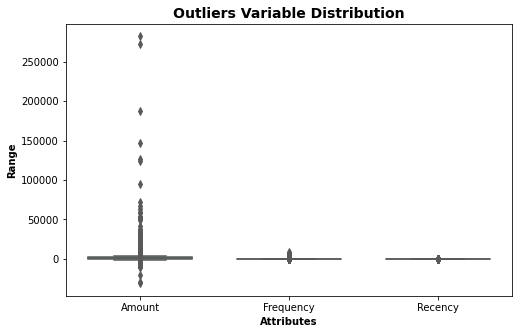

In [100]:
# Outlier Analysis of Amount Frequency and Recency

attributes = ['Amount','Frequency','Recency']
plt.rcParams['figure.figsize'] = [8,5]
sns.boxplot(data = rfm[attributes], orient="v", palette="Set2" ,whis=1.5,saturation=1, width=0.7)
plt.title("Outliers Variable Distribution", fontsize = 14, fontweight = 'bold')
plt.ylabel("Range", fontweight = 'bold')
plt.xlabel("Attributes", fontweight = 'bold')

Conclusion Drawn:-
* **From the above boxplot we can see that for the 'Amount' there are more numbers of outliers present as compared to frequency and recency.**

# **So Now We Will Use Inter-Quartile Range (IQR) Method To Remove Those Outliers Present.**

In [101]:
# Removing outliers for Amount
Q1 = rfm.Amount.quantile(0.05)
Q3 = rfm.Amount.quantile(0.95)
IQR = Q3 - Q1
rfm = rfm[(rfm.Amount >= Q1 - 1.5*IQR) & (rfm.Amount <= Q3 + 1.5*IQR)]

# Removing outliers for Recency
Q1 = rfm.Recency.quantile(0.05)
Q3 = rfm.Recency.quantile(0.95)
IQR = Q3 - Q1
rfm = rfm[(rfm.Recency >= Q1 - 1.5*IQR) & (rfm.Recency <= Q3 + 1.5*IQR)]

# Removing outliers for Frequency
Q1 = rfm.Frequency.quantile(0.05)
Q3 = rfm.Frequency.quantile(0.95)
IQR = Q3 - Q1
rfm = rfm[(rfm.Frequency >= Q1 - 1.5*IQR) & (rfm.Frequency <= Q3 + 1.5*IQR)]

Text(0.5, 0, 'Attributes')

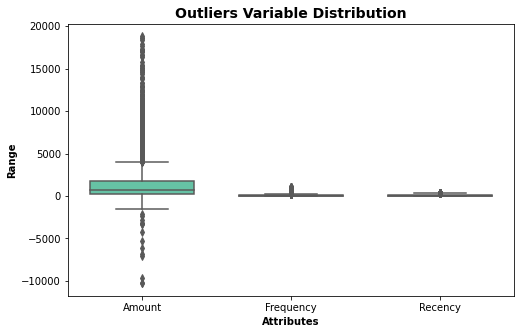

In [102]:
# Check whether the outliers have been removed or not
attributes = ['Amount','Frequency','Recency']
plt.rcParams['figure.figsize'] = [8,5]
sns.boxplot(data = rfm[attributes], orient="v", palette="Set2" ,whis=1.5,saturation=1, width=0.7)
plt.title("Outliers Variable Distribution", fontsize = 14, fontweight = 'bold')
plt.ylabel("Range", fontweight = 'bold')
plt.xlabel("Attributes", fontweight = 'bold')

**Conclusion Drawn:-**
* **From the above boxplot we can say that even after applying the IQR method it doesn't removed the outliers for Amount , Frequency and Recency features.**

# **Rescaling the Attributes**:-
* **It is extremely important to rescale the features so that they have a comparable scale.**
* **There are two common ways of rescaling:-**
  
  * **Min-Max scaling**
  
  * **Standardization (mean-0, sigma-1)**              

**Here, we will use Standardization Scaling.**

In [103]:
# Rescaling the attributes

rfm_df = rfm[['Amount', 'Frequency', 'Recency']]

# Make Instance (Object)
scaler = StandardScaler()

# This method performs fit and transform on the input data at a single time and converts the data points
rfm_df_scaled = scaler.fit_transform(rfm_df)
rfm_df_scaled

array([[-0.64272795, -0.66036458,  2.30701503],
       [ 1.1427172 ,  0.52451945, -0.90468319],
       [ 0.75177099,  0.68250399, -0.18105982],
       ...,
       [-0.56957027, -0.587955  , -0.8452073 ],
       [ 0.22508953,  4.30298296, -0.88485789],
       [ 0.11837708, -0.21274173, -0.49826459]])

In [104]:
# Fetch values of 'Amount' , 'Frequency' and 'Recency' into a dataframe format after rescaling
rfm_df_scaled = pd.DataFrame(rfm_df_scaled)
rfm_df_scaled.columns = ['Amount', 'Frequency', 'Recency']
rfm_df_scaled

,Amount,Frequency,Recency
0,-0.642728,-0.660365,2.307015
1,1.142717,0.524519,-0.904683
2,0.751771,0.682504,-0.181060
3,0.085348,-0.192994,-0.736168
4,-0.504201,-0.561624,2.148413
...,...,...,...
4292,2.808264,1.465844,1.831208
4293,-0.609248,-0.627451,0.869681
4294,-0.569570,-0.587955,-0.845207
4295,0.225090,4.302983,-0.884858


# **Building The Model.**
**K-Means Clustering**
* **K-Means Clustering** is one of the simplest and popular unsupervised machine learning algorithm.

The algorithm works as follows:

- First we initialize k points, called means, randomly.
- We categorize each item to its closest mean and we update the mean's co-ordinates, which are the averages of the items categorized in that mean so far.
- We repeat the process for a given number of iterations and at the end, we have our clusters.

In [105]:
# K-means with some arbitrary k

kmeans = KMeans(n_clusters=4, max_iter=50)
kmeans.fit(rfm_df_scaled)

KMeans(max_iter=50, n_clusters=4)

In [106]:
# Fetch lable values of K-Means Clustering
kmeans.labels_

array([1, 2, 2, ..., 0, 3, 0], dtype=int32)

# **Finding the Optimal Number of Clusters**
**Elbow Curve to get the right number of Clusters:-**

* A fundamental step for any unsupervised algorithm is to determine the optimal number of clusters into which the data may be clustered. The Elbow Method is one of the most popular methods to determine this optimal value of k.

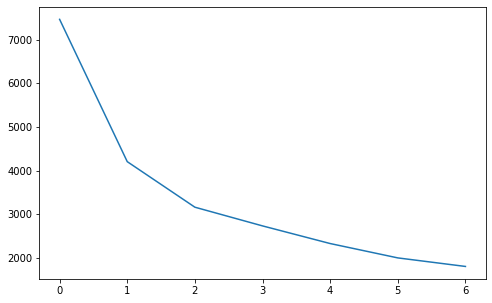

In [107]:
# Elbow method to get right numbers of clusters

sse = []
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]
for num_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(rfm_df_scaled)
    
    sse.append(kmeans.inertia_)
    
# plot the SSE's for each n_clusters
plt.plot(sse)

**Silhouette Analysis:-**
* **Silhouette analysis can be used to study the separation distance between the resulting clusters. The silhouette plot displays a measure of how close each point in one cluster is to points in the neighboring clusters and thus provides a way to assess parameters like number of clusters visually.**
* **Silhouette Score = p−q / max(p,q)**
* **p is the mean distance to the points in the nearest cluster that the data point is not a part of**

* **q is the mean intra-cluster distance to all the points in its own cluster.**

* **The value of the silhouette score range lies between -1 to 1.**

* **A score closer to 1 indicates that the data point is very similar to other data points in the cluster.**

* **A score closer to -1 indicates that the data point is not similar to the data points in the cluster.**

In [108]:
# Silhouette analysis
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]

for num_clusters in range_n_clusters:
    
    # Make Instance (Object)
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(rfm_df_scaled)
    
    cluster_labels = kmeans.labels_
    
    # silhouette score
    silhouette_avg = silhouette_score(rfm_df_scaled, cluster_labels)
    print("For n_clusters={0}, the silhouette score is {1}".format(num_clusters, silhouette_avg))

For n_clusters=2, the silhouette score is 0.5972737431264457
For n_clusters=3, the silhouette score is 0.5309057399273924
For n_clusters=4, the silhouette score is 0.5146945440191507
For n_clusters=5, the silhouette score is 0.4513088142149408
For n_clusters=6, the silhouette score is 0.43318396385863195
For n_clusters=7, the silhouette score is 0.43783606355395843
For n_clusters=8, the silhouette score is 0.43020273871309683


* **From the above Silhouette analysis we get to know that:-**
  
  * **For n_clusters=2:-** There is the highest Silhouette score whereas.
  
  * **For n_clusters=8:-** This is the least Silhouette score.

In [109]:
# Final model with k=3
kmeans = KMeans(n_clusters=3, max_iter=50)
kmeans.fit(rfm_df_scaled)

KMeans(max_iter=50, n_clusters=3)

In [110]:
# Assign the label
rfm['Cluster_Id'] = kmeans.labels_
rfm.head()

,CustomerID,Amount,Frequency,Recency,Cluster_Id
0,12346.0,0.00,2,325,1
1,12347.0,4310.00,182,1,2
2,12348.0,3366.27,206,74,2
3,12349.0,1757.55,73,18,2
4,12350.0,334.40,17,309,1


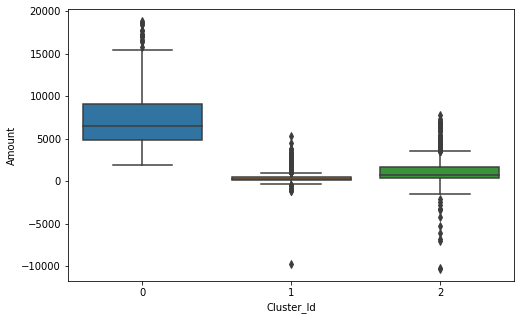

In [111]:
# Box plot to visualize Cluster Id vs Amount

sns.boxplot(x='Cluster_Id', y='Amount', data=rfm)

**Conclusion Drawn:-**
* **From the above boxplot we get to see that the Cluster_Id = 0 has the highest 25% (Q1) , Median (Q2) and 75% (Q3) as compared to other Cluster_Id's.**

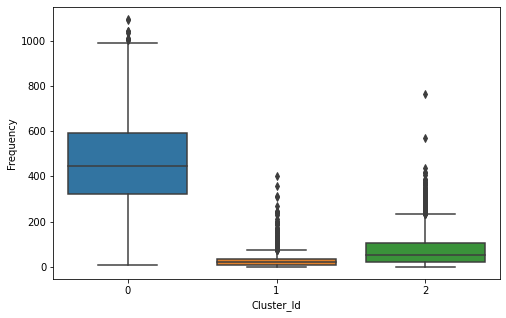

In [112]:
# Box plot to visualize Cluster Id vs Frequency

sns.boxplot(x='Cluster_Id', y='Frequency', data=rfm)

**Conclusion Drawn:-**
* **From the above boxplot we get to see that the Cluster_Id = 0 has the highest 25% (Q1) , Median (Q2) and 75% (Q3) as compared to other Cluster_Id's.**

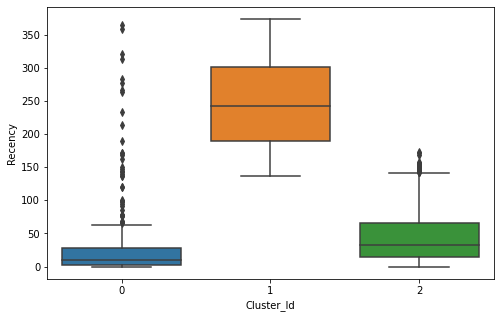

In [113]:
# Box plot to visualize Cluster Id vs Recency

sns.boxplot(x='Cluster_Id', y='Recency', data=rfm)

**Conclusion Drawn:-**
* **From the above boxplot we get to see that the Cluster_Id = 1 has the highest 25% (Q1) , Median (Q2) and 75% (Q3) as compared to other Cluster_Id's.**